# Analysis of Customer Shopping Trends

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1) Importing and inspecting the data

In [29]:
df = pd.read_csv("C:/Users/hamza/Documents/Best Projects/Customer-Shopping-Trends/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Lets starts with a basic overview of our data

In [31]:
dataset_shape = df.shape
dataset_info = df.info()

missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

numerical_summary = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

All of our data types are accurate and do not need changing

In [33]:
dataset_shape

(3900, 19)

We have 3900 rows of customer purchase data, and 19 features

In [35]:
missing_values

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [36]:
duplicate_rows

0

In [37]:
duplicated_id = df['Customer ID'].nunique()

In [38]:
duplicated_id

3900

We have no missing values and no duplicate rows

In [40]:
numerical_summary

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


From this numerical summary, we can see that:
- Age ranges from 18 to 70, with an average age of 44
- Purchase amount ranges from 20 to 100, with an average of 60
- Review ratings range from 2.5 to 5, with an average of 3.75
- Previous purchases range from 1 to 50, with an average of 25

### Section 2) Exploratory Data Analysis

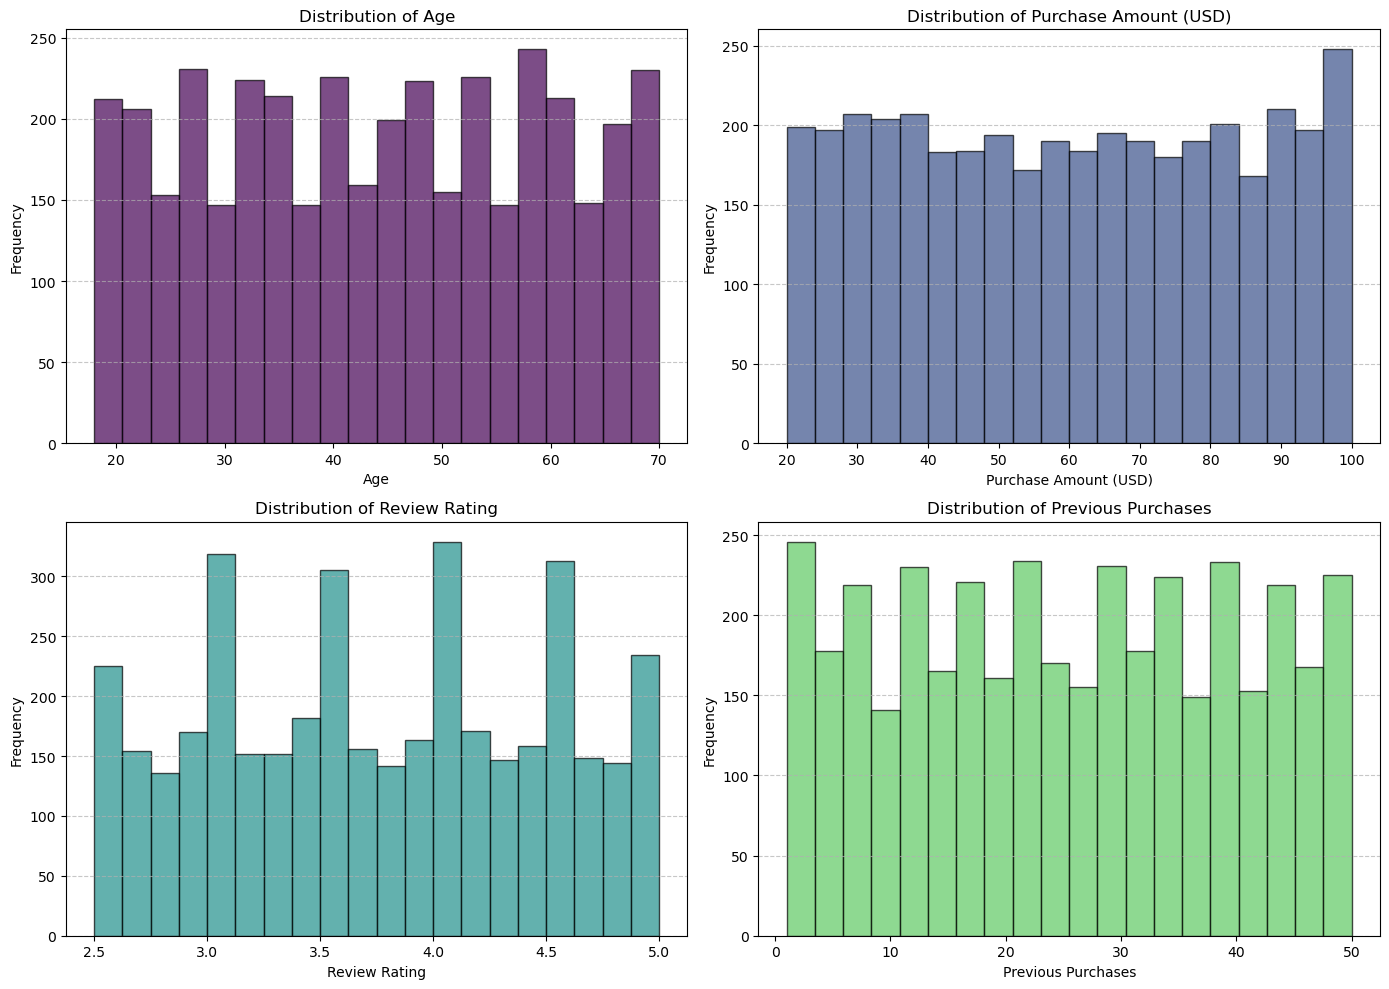

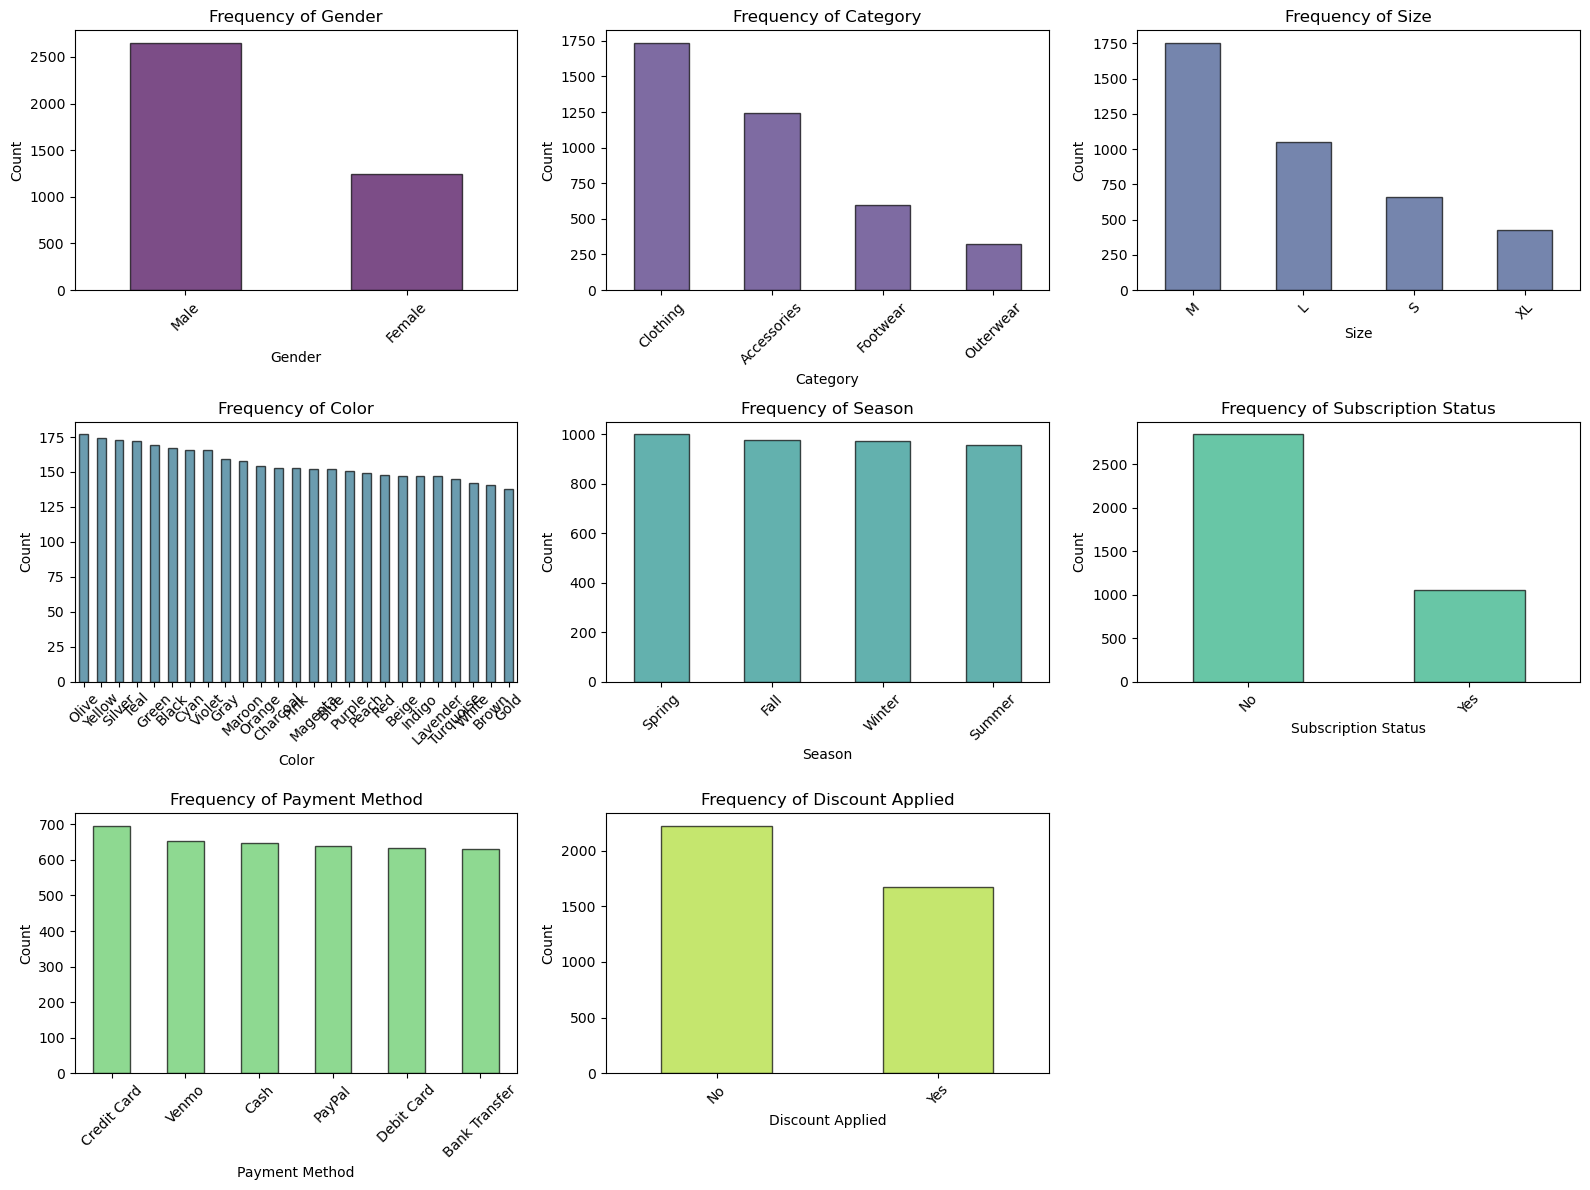

In [56]:
from matplotlib.cm import viridis

numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_columns = ['Gender', 'Category', 'Size', 'Color', 'Season', 
                       'Subscription Status', 'Payment Method', 'Discount Applied']

# Numerical columns visualization with Viridis palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    color = viridis(i / len(numerical_columns))  # Assign a unique color for each subplot
    axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black', color=color)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Categorical columns visualization with Viridis palette
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    color = viridis(i / len(categorical_columns))  # Assign a unique color for each subplot
    df[col].value_counts().plot(kind='bar', ax=axes[i], color=color, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Purchases are distributed evenly across age, 20-70
- Purchase amounts are also distributed evenly, but the most purchases are between 20-40$ and 80-100$
- Ratings are evenly distributed, and most people leave ratings in multiples of 0.5 as that is most convenient
- Most customers are repeat customers with many previous purchases
- Males purchase more frequently than females, Clothing is the most popular purchase category, and Medium is the most popular size
- Outerwear is the least popular purchase category, and XL is the least popular size
- There really isn't much difference in color or season
- Most customers do not have a subscription, can be targeted to increase revenue
- Payment method is evenly distributed and around only 33% of customers use discount coupons when purchasing

### Section 3) Customer Demographic Analysis

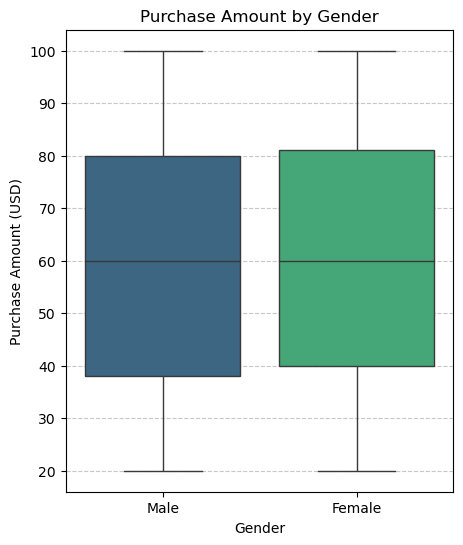

In [58]:
# Boxplot of Purchase Amount by Gender
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette="viridis", hue='Gender')
plt.title("Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Males and Females spend around the same when purchasing

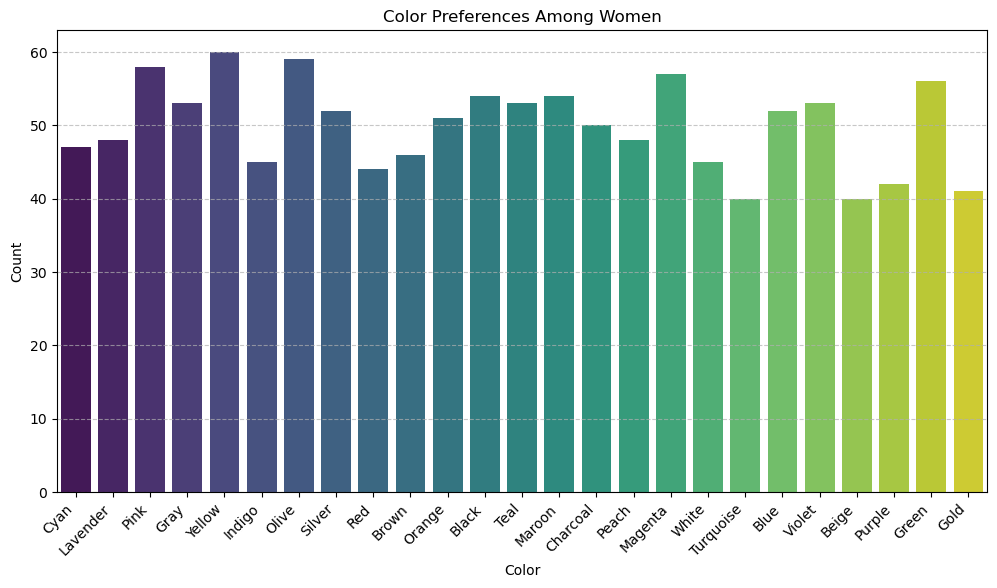

In [267]:
# Filter data for Female and Male
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']

# Count plot for Color preferences among Females
plt.figure(figsize=(12, 6))
sns.countplot(data=female_data, x='Color', palette="viridis", hue='Color')
plt.title("Color Preferences Among Women")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Women purchase these colors the least: cyan, lavender, indigo, red, brown, white, turquoise, beige, purple, and gold.

Women purchase these colors the most: pink, yellow, olive, magenta, and green

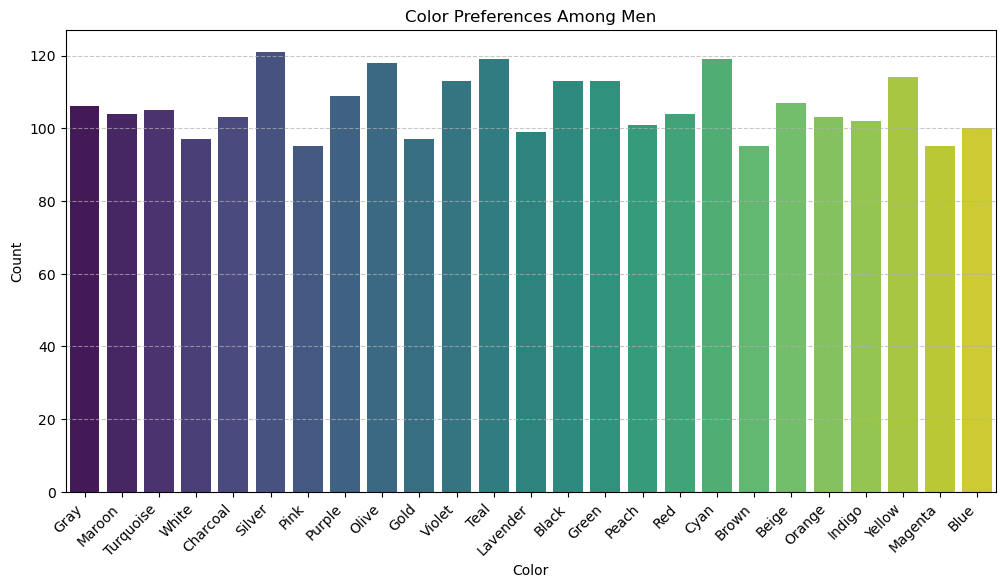

In [265]:
# Count plot for Color preferences among Males
plt.figure(figsize=(12, 6))
sns.countplot(data=male_data, x='Color', palette="viridis", hue='Color')
plt.title("Color Preferences Among Men")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Men purchase these colors the least: white, pink, gold, lavender, brown, magenta

Men purchase these colors the most: silver, purple, olive, violet, teal, black, green, cyan and yellow

Comparing and contrasting men and women:
- Both men and women show a strong preference for olive, green, and yellow, while they tend to purchase brown, white, and lavender the least.
- Women tend to purchase pink and magenta the most, while these colors are among the least purchased by men. 
- Conversely, men prefer silver, teal, black, and cyan, which are not as popular among women.

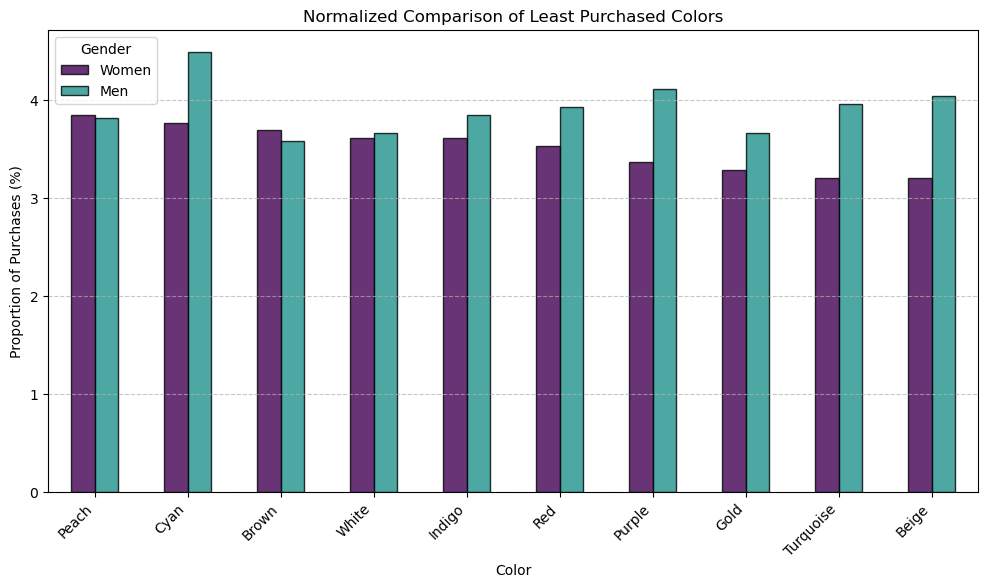

In [179]:
total_women = len(female_data)
total_men = len(male_data)

# Extract the ten least purchased colors for women
least_purchased_colors_women = female_data['Color'].value_counts().tail(10)

# Count the purchases for these colors among men
least_purchased_colors_men_counts = male_data[male_data['Color'].isin(least_purchased_colors_women.index)]['Color'].value_counts()

# Normalize the counts by dividing by the total number of customers in each gender
comparison_df_normalized = pd.DataFrame({
    'Women Proportion (%)': (least_purchased_colors_women / total_women) * 100,
    'Men Proportion (%)': [(least_purchased_colors_men_counts[color] / total_men) * 100 for color in least_purchased_colors_women.index]
})

# Applying the Viridis palette to the bar chart
viridis_colors = [viridis(i / 2) for i in range(2)]  # One color for Women, one for Men

# Plotting the normalized bar chart with Viridis palette
comparison_df_normalized.plot(kind='bar', figsize=(12, 6), color=viridis_colors, edgecolor='black', alpha=0.8)
plt.title("Normalized Comparison of Least Purchased Colors")
plt.xlabel("Color")
plt.ylabel("Proportion of Purchases (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender", labels=["Women", "Men"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This chart shows us what percentage of the total population of each gender bought from the ten least popular colors among women

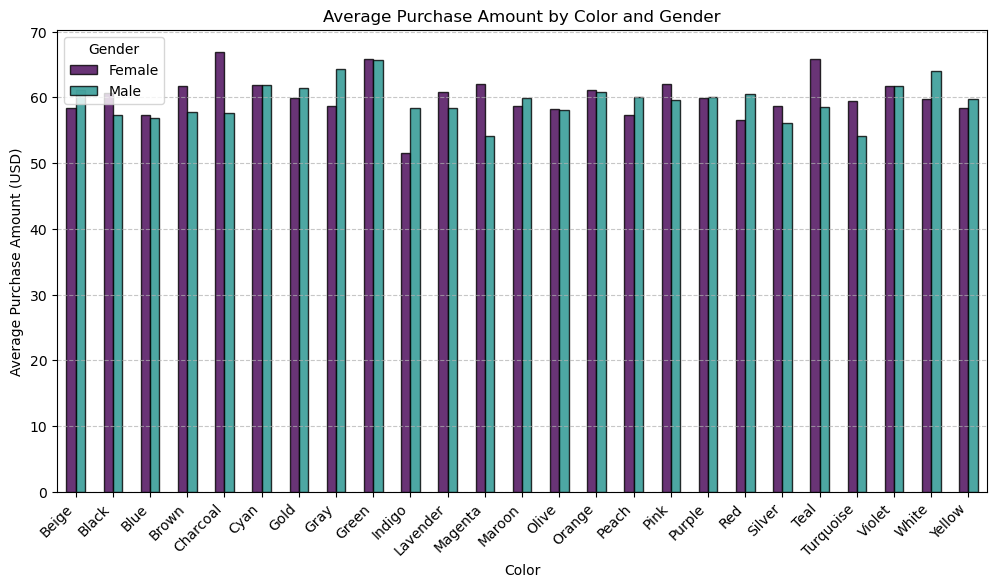

In [181]:
# Grouped bar chart showing average Purchase Amount by Color and Gender
avg_purchase_color_gender = df.groupby(['Color', 'Gender'])['Purchase Amount (USD)'].mean().unstack()

# Applying the Viridis palette
viridis_colors = [viridis(i / 2) for i in range(2)]  # One color for Women, one for Men

# Plotting the grouped bar chart with Viridis palette
avg_purchase_color_gender.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black', color=viridis_colors)
plt.title("Average Purchase Amount by Color and Gender")
plt.xlabel("Color")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Green seems to be the most expensive clothing color on average

Indigo seems to be the least expensive

In [184]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


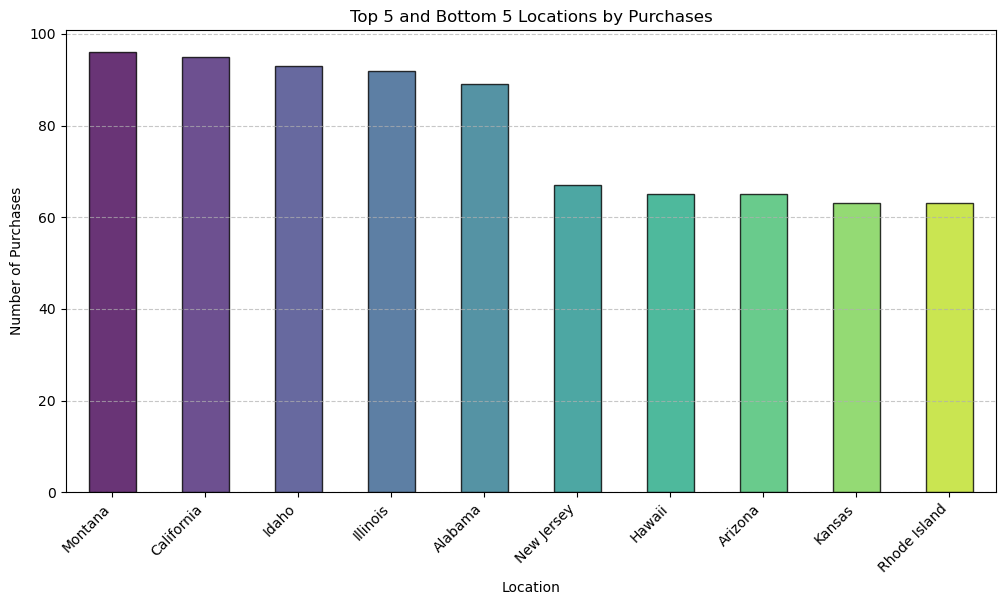

In [194]:
# Combine top 5 and bottom 5 locations into a single DataFrame
combined_locations = pd.concat([top_5_locations, bottom_5_locations])

# Generate colors using the Viridis palette
combined_colors = [viridis(i / len(combined_locations)) for i in range(len(combined_locations))]

# Plotting the combined bar chart for top 5 and bottom 5 locations
plt.figure(figsize=(12, 6))
combined_locations.plot(kind='bar', color=combined_colors, edgecolor='black', alpha=0.8)
plt.title("Top 5 and Bottom 5 Locations by Purchases")
plt.xlabel("Location")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Montana and California make the most purchases

Kansas and Rhode Island make the least purchases

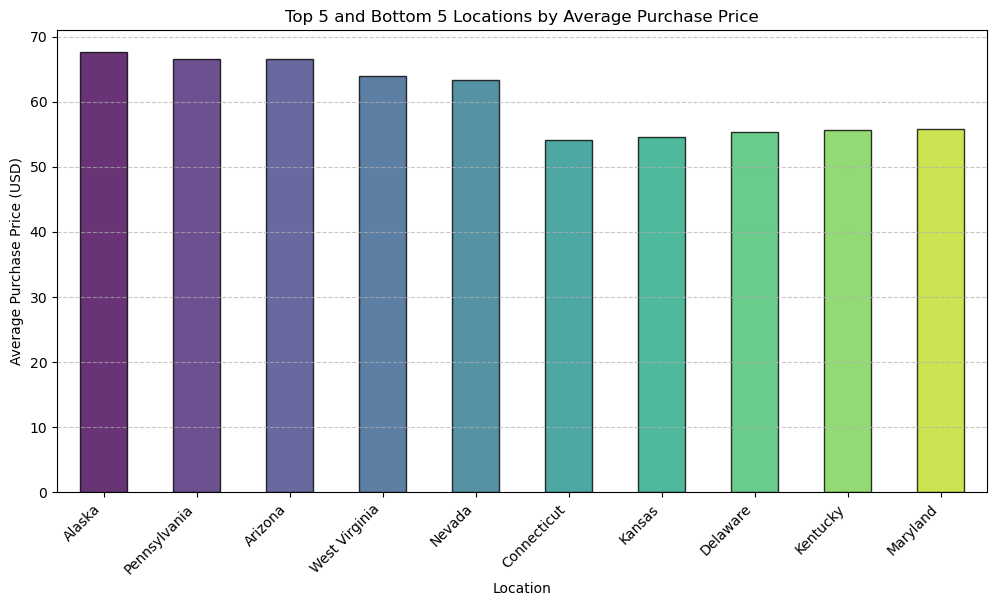

In [263]:
# Calculate average purchase price by location
average_purchase_price_by_location = df.groupby('Location')['Purchase Amount (USD)'].mean()

# Split data into top 5 and bottom 5 locations by average purchase price
top_5_avg_price_locations = average_purchase_price_by_location.nlargest(5)
bottom_5_avg_price_locations = average_purchase_price_by_location.nsmallest(5)

# Combine top 5 and bottom 5 locations into a single DataFrame
combined_avg_price_locations = pd.concat([top_5_avg_price_locations, bottom_5_avg_price_locations])

# Generate colors using the Viridis palette
from matplotlib.cm import viridis
combined_avg_price_colors = [viridis(i / len(combined_avg_price_locations)) for i in range(len(combined_avg_price_locations))]

# Plotting the combined bar chart for top 5 and bottom 5 locations by average purchase price
plt.figure(figsize=(12, 6))
combined_avg_price_locations.plot(kind='bar', color=combined_avg_price_colors, edgecolor='black', alpha=0.8)
plt.title("Top 5 and Bottom 5 Locations by Average Purchase Price")
plt.xlabel("Location")
plt.ylabel("Average Purchase Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Alaska and Pennsylvania have the most expensive purchases on average

Kentucky and Maryland have the least expensive purchases on average

### Section 4) Product and Category Analysis

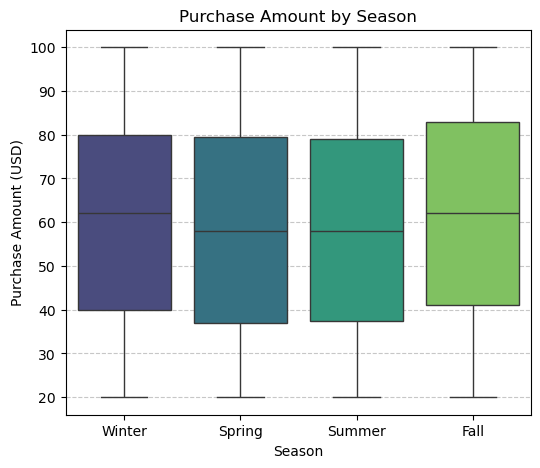

In [60]:
# Boxplot of Purchase Amount by Season
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette="viridis", hue='Season')
plt.title("Purchase Amount by Season")
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Purchasing amounts do not vary by season

<Figure size 1000x600 with 0 Axes>

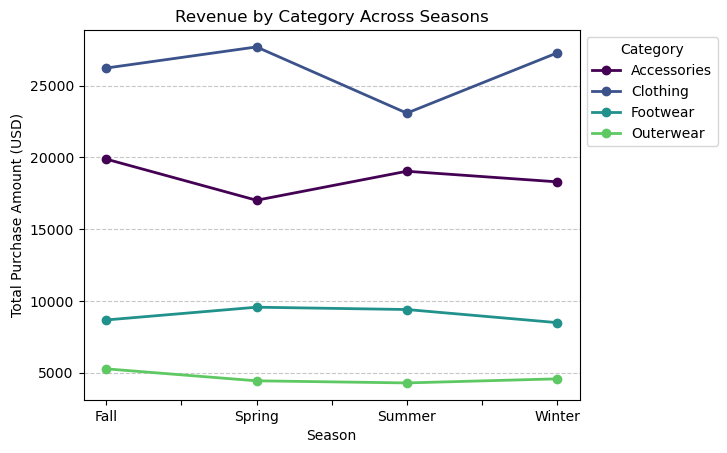

In [269]:
# Grouping data to calculate the sum of Purchase Amount for each Category across Seasons
category_season_sum = df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack()

# Generate distinct colors using the Viridis palette for each category
category_colors = [viridis(i / len(category_season_sum.columns)) for i in range(len(category_season_sum.columns))]

# Plotting the line chart with Viridis palette
plt.figure(figsize=(10, 6))
category_season_sum.plot(kind='line', marker='o', linewidth=2, color=category_colors)
plt.title("Revenue by Category Across Seasons")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.legend(title="Category", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Clothing takes a dip in the summer, perhaps due to the weather which makes people buy less clothing

Accessories take a dip in spring

Outerwear brings in the least revenue

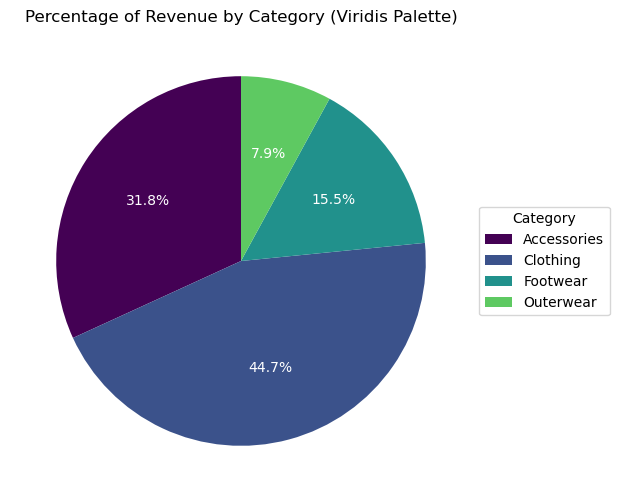

In [275]:
# Calculating total revenue for each category
category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum()

# Generate colors using the Viridis palette
from matplotlib.cm import viridis
category_colors = [viridis(i / len(category_revenue)) for i in range(len(category_revenue))]

# Custom autopct function to style text color as white
def white_autopct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# Plotting the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    autopct=lambda pct: white_autopct(pct),
    startangle=90,
    colors=category_colors,
    textprops={'color': 'black'},  # Category label color
)

# Set percentage text color to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Percentage of Revenue by Category (Viridis Palette)")
plt.legend(wedges, category_revenue.index, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

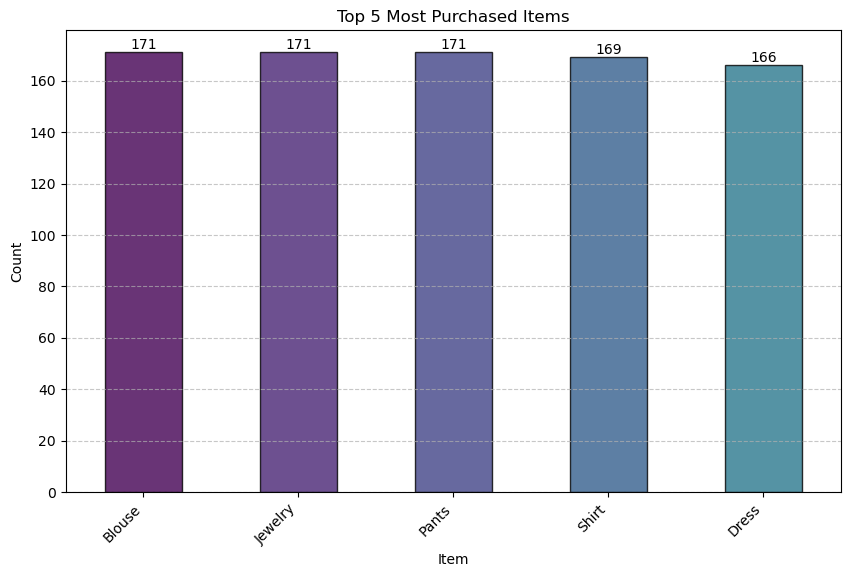

In [126]:
top_5_colors = [viridis(i / 10) for i in range(10)]

# Data for the top 5 items
top_5_items = df['Item Purchased'].value_counts().head(5)

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = top_10_items.plot(kind='bar', color=top_5_colors, edgecolor='black', alpha=0.8)

# Adding counts on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.title("Top 5 Most Purchased Items")
plt.xlabel("Item")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Blouses are the most popular item

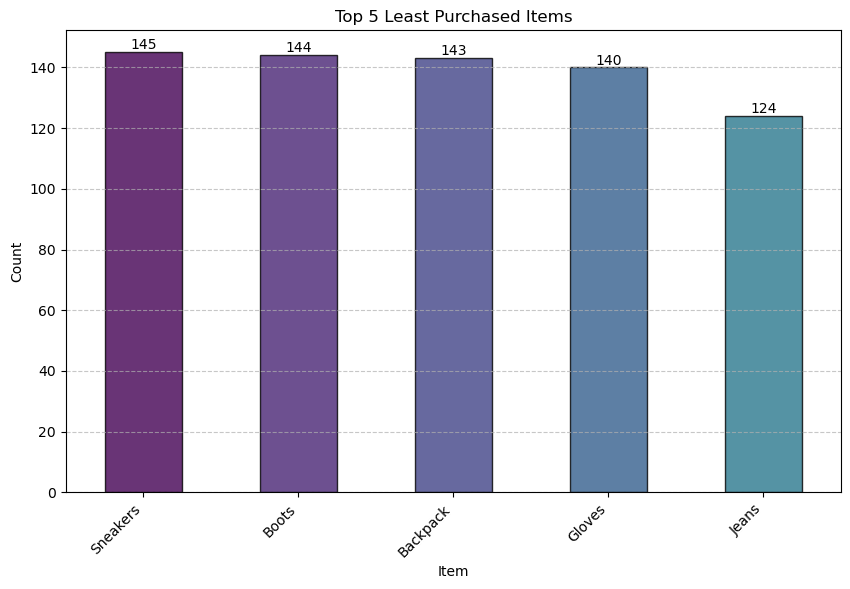

In [148]:
# Data for the top 5 items
bottom_5_items = df['Item Purchased'].value_counts().tail(5)

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = bottom_5_items.plot(kind='bar', color=top_5_colors, edgecolor='black', alpha=0.8)

# Adding counts on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.title("Top 5 Least Purchased Items")
plt.xlabel("Item")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jeans are the least popular item

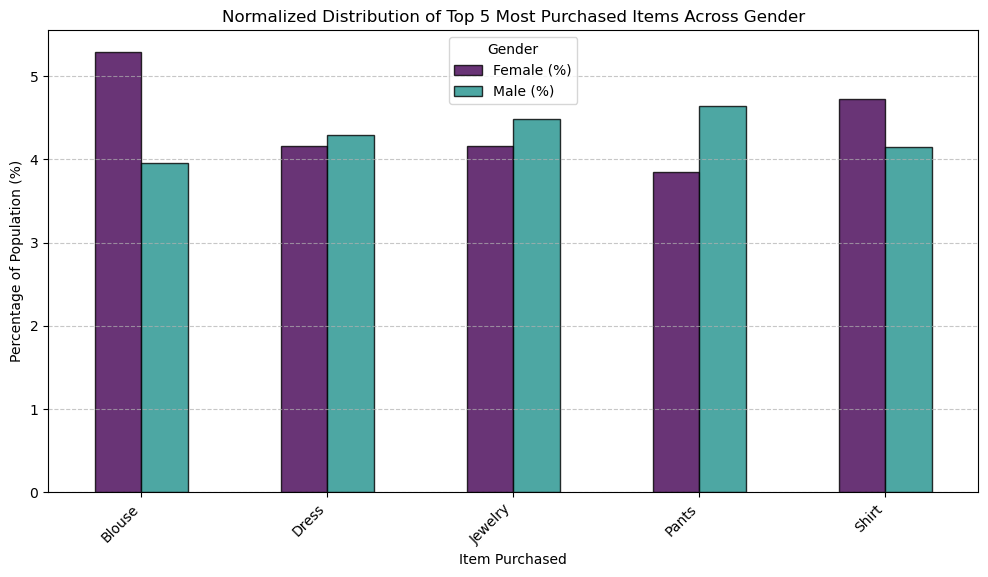

In [140]:
# Creating a bar plot to show the distribution of the top 5 items across gender
import seaborn as sns
import matplotlib.pyplot as plt

top_5_items = df['Item Purchased'].value_counts().head(5).index
top_5_data = df[df['Item Purchased'].isin(top_5_items)]

top_5_normalized = top_5_data.groupby(['Item Purchased', 'Gender']).size().unstack(fill_value=0)
top_5_normalized['Female (%)'] = (top_5_normalized['Female'] / total_women) * 100
top_5_normalized['Male (%)'] = (top_5_normalized['Male'] / total_men) * 100

viridis_colors = [viridis(i / 2) for i in range(2)]
# Plotting the normalized bar chart
top_5_normalized[['Female (%)', 'Male (%)']].plot(kind='bar', figsize=(12, 6), color=viridis_colors, edgecolor='black', alpha=0.8)
plt.title("Normalized Distribution of Top 5 Most Purchased Items Across Gender")
plt.xlabel("Item Purchased")
plt.ylabel("Percentage of Population (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Women purchase more blouses and shirts

Men purchase slightly more dresses, jewelry, and pants

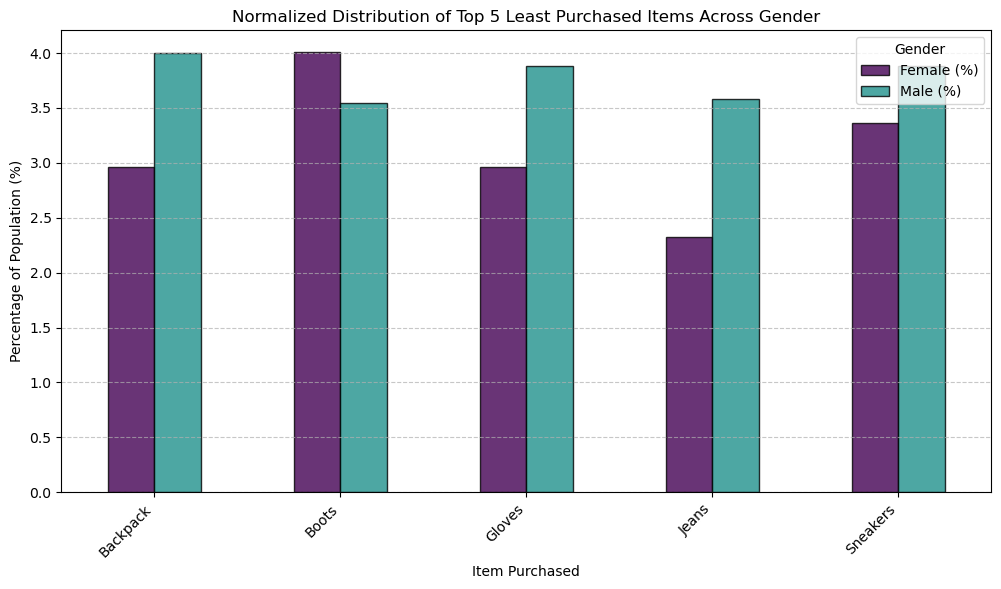

In [277]:
bottom_5_items = df['Item Purchased'].value_counts().tail(5).index

# Filtering the dataset for the bottom 5 items
bottom_5_data = df[df['Item Purchased'].isin(bottom_5_items)]

# Calculating proportions for each gender
bottom_5_normalized = bottom_5_data.groupby(['Item Purchased', 'Gender']).size().unstack(fill_value=0)
bottom_5_normalized['Female (%)'] = (bottom_5_normalized['Female'] / total_women) * 100
bottom_5_normalized['Male (%)'] = (bottom_5_normalized['Male'] / total_men) * 100

bottom_5_normalized[['Female (%)', 'Male (%)']].plot(
    kind='bar', figsize=(12, 6), color=viridis_colors, edgecolor='black', alpha=0.8
)
plt.title("Normalized Distribution of Top 5 Least Purchased Items Across Gender")
plt.xlabel("Item Purchased")
plt.ylabel("Percentage of Population (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Women purchase boots more than men

Men purchase backpacks, gloves, jeans, and sneakers more than women

### Section 5) Purchase Behavior Analysis

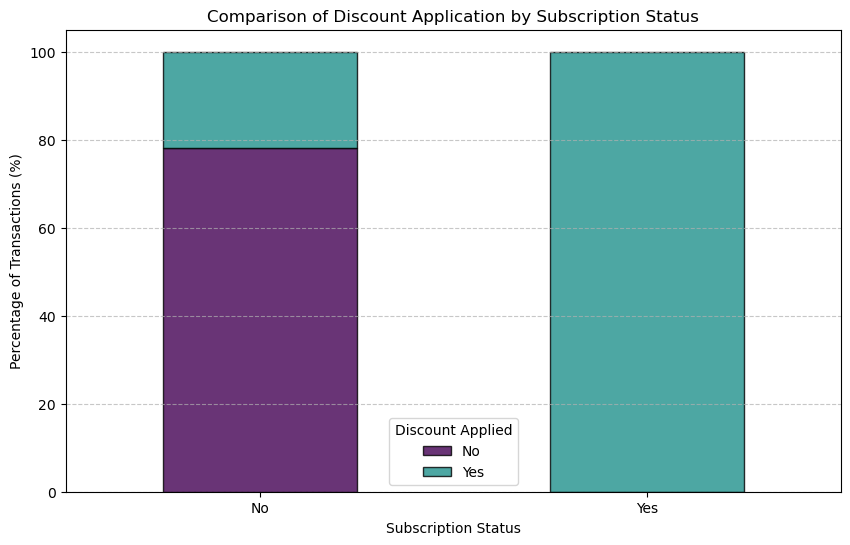

In [279]:
# Comparing the frequency of discount application by subscription status
discount_by_subscription = df.groupby(['Subscription Status', 'Discount Applied']).size().unstack(fill_value=0)

# Normalizing to calculate proportions for each subscription status
discount_by_subscription_normalized = discount_by_subscription.div(discount_by_subscription.sum(axis=1), axis=0) * 100

# Generating colors using the Viridis palette
viridis_colors = [viridis(i / len(discount_by_subscription_normalized.columns)) for i in range(len(discount_by_subscription_normalized.columns))]

# Plotting the comparison of discount application by subscription status
discount_by_subscription_normalized.plot(
    kind='bar', figsize=(10, 6), stacked=True, color=viridis_colors, edgecolor='black', alpha=0.8
)
plt.title("Comparison of Discount Application by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Percentage of Transactions (%)")
plt.xticks(rotation=0)
plt.legend(title="Discount Applied", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

100% of subscribers used discount codes

22% of non-subscribers used discount codes